In [30]:
from PIL import Image
import numpy as np
import pytesseract

img = Image.open("September.png")
print(type(img))

img.show()
print(img.format)

img1 = np.asarray(img)
print(type(img1))

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
<class 'numpy.ndarray'>


<class 'numpy.ndarray'>
(3308, 2339, 4)


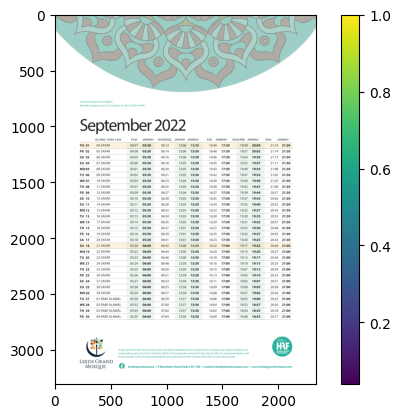

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('September.png')
print(type(img))
print(img.shape)
plt.imshow(img)
plt.colorbar()


In [42]:
from skimage import io, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

image = io.imread("September.png")
fl = img_as_float(image)
print(image)

[[[0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  ...
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.81960784 0.81176471 0.76862745 1.        ]]

 [[0.69411765 0.67843137 0.64705882 1.        ]
  [0.68627451 0.6745098  0.62352941 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  ...
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.81960784 0.81176471 0.76862745 1.        ]]

 [[0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  ...
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.69411765 0.67843137 0.64705882 1.        ]
  [0.81960784 0.81176471 0.76862745 1.        ]]

 ...

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.     

In [5]:
import cv2
from matplotlib import pyplot as plt

gimg = cv2.imread("September.png", 0)
cimg = cv2.imread("September.png", 1)

# plt.imshow(img)
plt.imshow(cv2.cvtColor(gimg, cv2.COLOR_BGR2RGB))

# cv2.imshow("", cimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import cv2
import glob

path = "images/test_images"

for file in glob.glob(path):
    #goes through each image in folder

Jumu’ah prayers at 01:00pm.
Iqamah changes occur on Sundays or start of the month
ISLAMIC HIRA 1444 FAJR JAMMAH SHUROOQ DHUHR JAMMAH ASR JAMMAH = MAGHRIB JAMMAH ISHA = JAMMAH
TH 01 04 SAFAR 04:57 05:30 06:12 13:06 13:30 16:49 17:30 19:59 20:04 21:15 21:30
FR 02 05 SAFAR 04:58 05:30 06:14 13:06 13:30 16:48 17:30 19:57 20:02 21:14 21:30
SA 03 06 SAFAR 04:59 05:30 06:16 13:06 13:30 16:46 17:30 19:54 19:59 21:13 21:30
SU 04 07 SAFAR 05:00 05:30 06:18 13:05 13:30 16:45 17:30 19:52 19:57 21:11 21:30
MOO05 08 SAFAR 05:01 05:30 06:20 13:05 13:30 16:43 17:30 19:49 19:54 21:08 21:30
TU 06 09 SAFAR 05:02 05:30 06:21 13:05 13:30 16:42 17:30 19:47 19:52 21:05 21:30
WE 07 10 SAFAR 05:04 05:30 06:23 13:04 13:30 16:40 17:30 19:44 19:49 21:03 21:30
TH 08 11 SAFAR 05:07 05:30 06:25 13:04 13:30 16:38 17:30 19:42 19:47 21:00 21:30
FR 09 12 SAFAR 05:09 05:30 06:27 13:04 13:30 16:37 17:30 19:39 19:44 20:57 21:30
SA 10 13 SAFAR 05:10 05:30 06:28 13:03 13:30 16:35 17:30 19:37 19:42 20:56 21:30
SU 11 14 SAFAR 

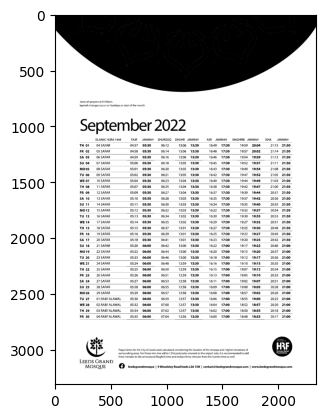

In [77]:
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from pytesseract import Output

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

img = cv2.imread('September.png')
# image = cv2.resize(img, (500, int((3308/2339)*500)))

gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

# characters
# h, w, c = img.shape
# pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
# boxes = pytesseract.image_to_boxes(img)
# for b in boxes.splitlines():
#     b = b.split(' ')
#     img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# words
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# date
# d = pytesseract.image_to_data(img, output_type=Output.DICT)
# keys = list(d.keys())

# date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

# n_boxes = len(d['text'])
# for i in range(n_boxes):
#     if int(d['conf'][i]) > 60:
#     	if re.match(date_pattern, d['text'][i]):
# 	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
# 	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

print(pytesseract.image_to_string(thresh, config=r'--oem 3 --psm 6'))

# Usage:
#   tesseract --help | --help-extra | --help-psm | --help-oem | --version
#   tesseract --list-langs [--tessdata-dir PATH]
#   tesseract --print-parameters [options...] [configfile...]
#   tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]
 
# OCR options:
#   --tessdata-dir PATH   Specify the location of tessdata path.
#   --user-words PATH     Specify the location of user words file.
#   --user-patterns PATH  Specify the location of user patterns file.
#   --dpi VALUE           Specify DPI for input image.
#   -l LANG[+LANG]        Specify language(s) used for OCR.
#   -c VAR=VALUE          Set value for config variables.
#                      Multiple -c arguments are allowed.
#   --psm NUM             Specify page segmentation mode.
#   --oem NUM             Specify OCR Engine mode.
# NOTE: These options must occur before any configfile.
 
# Page segmentation modes:
#   0    Orientation and script detection (OSD) only.
#   1    Automatic page segmentation with OSD.
#   2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
#   3    Fully automatic page segmentation, but no OSD. (Default)
#   4    Assume a single column of text of variable sizes.
#   5    Assume a single uniform block of vertically aligned text.
#   6    Assume a single uniform block of text.
#   7    Treat the image as a single text line.
#   8    Treat the image as a single word.
#   9    Treat the image as a single word in a circle.
#  10    Treat the image as a single character.
#  11    Sparse text. Find as much text as possible in no particular order.
#  12    Sparse text with OSD.
#  13    Raw line. Treat the image as a single text line,
#     bypassing hacks that are Tesseract-specific.
 
# OCR Engine modes:
#   0    Legacy engine only.
#   1    Neural nets LSTM engine only.
#   2    Legacy + LSTM engines.
#   3    Default, based on what is available.
 
# Single options:
#   -h, --help            Show minimal help message.
#   --help-extra          Show extra help for advanced users.
#   --help-psm            Show page segmentation modes.
#   --help-oem            Show OCR Engine modes.
#   -v, --version         Show version information.
#   --list-langs          List available languages for tesseract engine.
#   --print-parameters    Print tesseract parameters.


plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

# cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()